Preparing data splits using the joint mapping.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/tajak/Google Drive/GitHub/Genre-Datasets-Comparison/data-sheets-with-all-info/FTD-dataset-with-all-information.csv", sep="\t", index_col = 0)

df

,ID,labels,Multiple labels,text,length,GINCO_downcast_pred,MT-GINCO_downcast_pred,CORE_main_pred,CORE_sub_pred,labels_to_X-GENRE
0,__id__1-syndicate,A1 (argumentative),NaN,BMW's and Chinese Justice * * * * * In most pl...,975,News/Reporting,News/Reporting,Narrative,News Report/Blog,discarded
1,__id__2-syndicate,A1 (argumentative),NaN,China and a New Balance of Power SHANGHAI – Th...,956,Information/Explanation,Opinion/Argumentation,Opinion,Opinion Blog,discarded
2,__id__3-syndicate,A1 (argumentative),NaN,China and Russia in the New World Disorder Can...,978,Opinion/Argumentation,Opinion/Argumentation,Opinion,Opinion Blog,discarded
3,__id__4-syndicate,A1 (argumentative),NaN,The Roots of Chinese / Japanese Rivalry BOSTON...,957,Opinion/Argumentation,Opinion/Argumentation,Narrative,Historical Article,discarded
4,__id__5-syndicate,A1 (argumentative),NaN,China's Cyber-Warriors NEW DELHI – The world n...,1034,News/Reporting,News/Reporting,Narrative,News Report/Blog,discarded
...,...,...,...,...,...,...,...,...,...,...
1681,__id__1682-britannica,A1 (argumentative),NaN,"In Eichmann in Jerusalem , Hannah Arendt descr...",610,Information/Explanation,Information/Explanation,Narrative,Historical Article,discarded
1682,__id__1683-britannica,A16 (information),NaN,The vast expanse of the African continent span...,381,Information/Explanation,Information/Explanation,Informational Description/Explanation,Description of a Thing,Information/Explanation
1683,__id__1684-britannica,A1 (argumentative),NaN,"Lance Corporal Samantha L. Jones , USMC Politi...",2482,Information/Explanation,Information/Explanation,Narrative,Historical Article,discarded
1684,__id__1685-britannica,A12 (promotion),NaN,"Courtesy of the Victoria and Albert Museum , L...",390,Information/Explanation,Information/Explanation,Informational Description/Explanation,Description of a Thing,Promotion


In [6]:
df.columns

Index(['ID', 'labels', 'Multiple labels', 'text', 'length',
       'GINCO_downcast_pred', 'MT-GINCO_downcast_pred', 'CORE_main_pred',
       'CORE_sub_pred', 'labels_to_X-GENRE'],
      dtype='object')

In [8]:
# For the experiments, we will use only texts with a single label and that are not marked as non-text, let's prepare the data accordingly
# Remove texts that are of a category "discarded"

final_df = df[df['labels_to_X-GENRE'] != "discarded"]

# Discard texts with multiple labels
final_df = final_df[final_df['Multiple labels'] != "y"]

final_df

,ID,labels,Multiple labels,text,length,GINCO_downcast_pred,MT-GINCO_downcast_pred,CORE_main_pred,CORE_sub_pred,labels_to_X-GENRE
27,__id__28-Bib1Amos_Prophecy_12_EN.txt,A4 (fiction),NaN,"Amos 1 1 The words of Amos , one of the shephe...",1002,Other,Other,Opinion,Religious Blogs/Sermons,Prose/Lyrical
29,__id__30-Bib1Ezra_History_12_EN.txt,A4 (fiction),NaN,Ezra 1 Cyrus Helps the Exiles to Return 1 In t...,1121,Information/Explanation,Other,Opinion,Religious Blogs/Sermons,Prose/Lyrical
31,__id__32-Bib1Ruth_History_12_EN.txt,A4 (fiction),NaN,Ruth 1 Naomi and Ruth 1 In the days when the j...,1575,Information/Explanation,Other,Opinion,Religious Blogs/Sermons,Prose/Lyrical
32,__id__33-Bib2John_Gospel_12_EN.txt,A4 (fiction),NaN,John 1 The Word Became Flesh 1 In the beginnin...,1944,Information/Explanation,Other,Opinion,Religious Blogs/Sermons,Prose/Lyrical
36,__id__37-Bib2Luke_Gospel_12_EN.txt,A4 (fiction),NaN,Luke 1 Introduction 1 Many have undertaken to ...,3068,Information/Explanation,Other,Opinion,Religious Blogs/Sermons,Prose/Lyrical
...,...,...,...,...,...,...,...,...,...,...
1679,__id__1680-britannica,A16 (information),NaN,NASA / TRACE / SMEX A transit is when one astr...,1282,Information/Explanation,Information/Explanation,Informational Description/Explanation,Historical Article,Information/Explanation
1680,__id__1681-britannica,A16 (information),NaN,"The amount of rain , snow , or other precipita...",1965,Information/Explanation,Information/Explanation,Informational Description/Explanation,Description of a Thing,Information/Explanation
1682,__id__1683-britannica,A16 (information),NaN,The vast expanse of the African continent span...,381,Information/Explanation,Information/Explanation,Informational Description/Explanation,Description of a Thing,Information/Explanation
1684,__id__1685-britannica,A12 (promotion),NaN,"Courtesy of the Victoria and Albert Museum , L...",390,Information/Explanation,Information/Explanation,Informational Description/Explanation,Description of a Thing,Promotion


In [10]:
labels = list(final_df['labels_to_X-GENRE'].unique())
labels

['Prose/Lyrical',
 'Promotion',
 'News',
 'Opinion/Argumentation',
 'Instruction',
 'Legal',
 'Information/Explanation']

In [15]:
print(labels)

['Prose/Lyrical', 'Promotion', 'News', 'Opinion/Argumentation', 'Instruction', 'Legal', 'Information/Explanation']


In [16]:
# Create a stratified split based on the label distribution, in the manner 60:20:20
import numpy as np
from sklearn.model_selection import train_test_split

train, devtest = train_test_split(final_df, test_size=0.4, random_state=42, shuffle = True, stratify = final_df['labels_to_X-GENRE'])

In [17]:
test, dev = train_test_split(devtest, test_size=0.5, random_state=42, shuffle = True, stratify = devtest['labels_to_X-GENRE'])

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

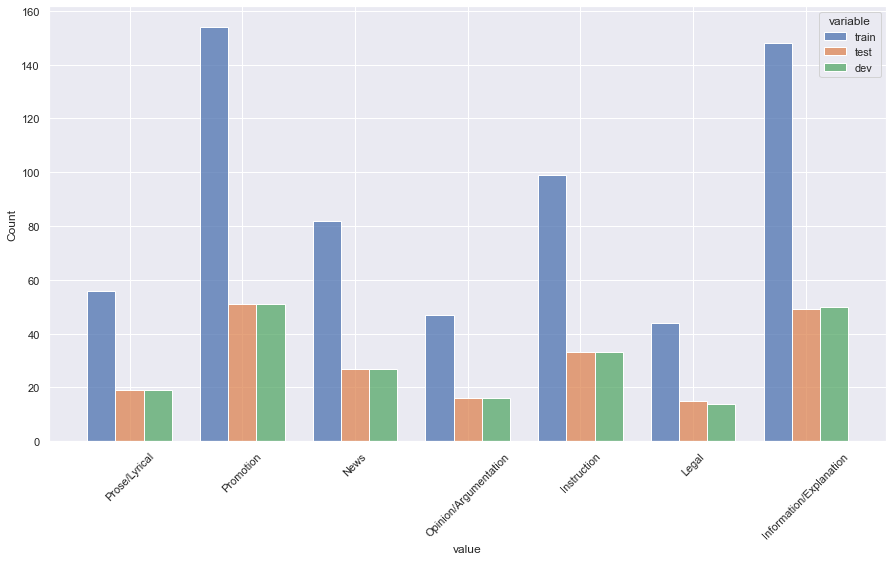

In [18]:
# Observe the distribution of labels in all splits
import matplotlib.pyplot as plt
import seaborn as sns

# make dataframe
distr_df = pd.DataFrame({"train":train['labels_to_X-GENRE'], "test":test['labels_to_X-GENRE'], "dev": dev['labels_to_X-GENRE']})

# plot melted dataframe in a single command
sns.set(rc = {'figure.figsize':(15,8)})

sns.histplot(distr_df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20)

plt.xticks(rotation=45)

In [19]:
print(distr_df.describe().to_markdown())

|        | train     | test      | dev       |
|:-------|:----------|:----------|:----------|
| count  | 630       | 210       | 210       |
| unique | 7         | 7         | 7         |
| top    | Promotion | Promotion | Promotion |
| freq   | 154       | 51        | 51        |


In [22]:
train.head(3)

,ID,labels,Multiple labels,text,length,GINCO_downcast_pred,MT-GINCO_downcast_pred,CORE_main_pred,CORE_sub_pred,labels_to_X-GENRE
1244,__id__1245-transformed,A12 (promotion),NaN,Publications and Workbooks by TransforMED Tran...,719,Promotion,Promotion,Informational Description/Explanation,Description of a Thing,Promotion
707,__id__708-co,A12 (promotion),NaN,The Wastepack Group is the leading support ser...,268,Promotion,Promotion,Informational Description/Explanation,Description of a Thing,Promotion
646,__id__647-co,A11 (personal),NaN,Victoria Reviews 2001 and Gives Us the Lowdown...,511,Other,Other,Opinion,Interview,Opinion/Argumentation


In [25]:
# Prepare the splits into a format for Simple Transformer
def Transformer_file(df, split_name):
	"""
	This function takes the split and creates a txt file that will be used for the training with Simple Transformers.

	Args:
	- df: the split in a dataframe format
	- split_name: name of the split (will be used in the name of the file)
	"""
	df = df[["text", 'labels_to_X-GENRE']]
	df.columns = ["text", "labels"]

	# Save the dataset
	df.to_csv(f"C:/Users/tajak/Google Drive/GitHub/Genre-Datasets-Comparison/data-splits/FTD-X-GENRE-{split_name}.txt", sep="\t")


In [26]:
Transformer_file(train, "train")
Transformer_file(test,"test")
Transformer_file(dev,"dev")